# The Calculation of 95% Confidence Interval

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Calculation of 95% confidence interval](#2-calculation-of-95-confidence-interval)

3. [Plotting Function of  Confidence Interval](#3-plotting-function-of-confidence-interval)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../')
from tropical_rainfall_class import TR_PR_Diagnostic as TR_PR_Diag

FDB5 binary library not present on system, disabling FDB support.


In [2]:
from tropical_rainfall_func import time_interpreter

#### ICON data

In [3]:
reader      = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon        = reader.retrieve()
icon        = icon.drop_vars('depth_full')
icon        = icon.isel(time=slice(1, -1))
icon

<xarray.Dataset>
Dimensions:  (time: 65, lat: 180, lon: 360, depth_full: 128)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2025-06-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: depth_full
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mslhfl   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msnsrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msntrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    msshfl   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mtnsrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    mtntrf   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ocpt     (time, depth_full, lat, lon) float64 dask.array<chunksize=(11, 128, 180, 360), meta=np.ndarray>
    so       (time, depth_full, lat, lon) float64 dask.array<chunksize=(11, 128, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>

#### IFS data

In [4]:
reader      = Reader(model="IFS", exp="tco2559-ng5", source="lra-r100-monthly") #"ICMGG_atm2d") #source="ICMU_atm2d")
ifs         = reader.retrieve()
ifs         = ifs.drop_vars('plev')
ifs         = ifs.isel(time=slice(1, -1))
ifs 

<xarray.Dataset>
Dimensions:  (time: 11, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 2020-03-01 ... 2020-12-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/20)
    2t       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    erate    (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(11, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(11, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-03 23:45:31 coordinates adjusted by AQUA fixer;\n

#### IFS-orca data

In [5]:
reader      = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_orca    = reader.retrieve()
ifs_orca    = ifs_orca.drop_vars('plev')
ifs_orca

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360, plev: 23)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-15 2020-02-15 ... 2024-12-15
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Dimensions without coordinates: plev
Data variables: (12/19)
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ewss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    lcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mcc      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...       ...
    nsss     (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(12, 23, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-07-03 23:45:34 coordinates adjusted by AQUA fixer;\n

In [6]:
diag = TR_PR_Diag()

## 2. Calculation of 95% confidence interval

#### The formula used to calculate the confidence interval is following:A confidence interval is a range of values within which we believe the true population parameter is likely to fall, given the sample data and a specified level of confidence.

The range of confidence interval we can find with the use of margin error:
$$
Confidence \_ interval = (Mean - Margin \_ error, Mean +  Margin \_ error)
$$


In statistics, the margin of error represents the maximum amount of error or uncertainty associated with estimating a population parameter based on a sample. It quantifies the range within which the true population parameter is expected to fall.

The formula used to calculate the margin error is following
$$
Margin \_ error = \frac{Z_{score} \times std(X_{pr})}{\sqrt N}
$$
where 
* $std(X_{pr})$ is the standart error of model variable, i.e., precipitation, 
* $N$ is the size of the dataset, 
* $Z_{score} = 1.96$ is value for a 95% confidence interval.

##### The global confidence interval can be found with the `confidence_interval_along_coordinate` function and bool argument `glob=True`: 

In [7]:
conf_interval_ifs = diag.confidence_interval_along_coordinate(ifs, glob=True)
conf_interval_ifs

(6.175302541613227e-05, 6.282715988380315e-05)

In [8]:
conf_interval_icon = diag.confidence_interval_along_coordinate(icon, glob=True)
conf_interval_icon

(6.0903315062124816e-05, 6.125986050071917e-05)

In [9]:
conf_interval_ifs_orca = diag.confidence_interval_along_coordinate(ifs_orca, glob=True)
conf_interval_ifs_orca

(6.428907347270518e-05, 6.463365065912138e-05)

##### The confidence interval along some coordinate (time, latitude or longitude) can be found as: 

In [ ]:
conf_interval_icon = diag.confidence_interval_along_coordinate(icon, coord='lat')
conf_interval_icon

## 3. Plotting Function of Confidence Interval

##### The `check_if_belong_to_confidence_interval` function checks if some dataset belongs to the confidence interval of the first dataset. By definition, the function does the check for era5 data and provided dataset. 

The most important feature of the function is that before comparing the confidence interval in the datasets function:

* verifies that two datasets are in the same units and, if not, converts the units of the second dataset to the units of the first dataset, 

* re-grids the time and space grid of the dataset, which has a higher time or spatial resolution. 

In [11]:
diag.check_if_belong_to_confidence_interval(ifs, dataset_2=ifs_orca, glob=True, plot=False)

The second dataset is not within the 95% confidence interval of the first dataset.


#### The function also has a bool argument `plot`, which is `True` by definition. In that case, the function returns plots of the two datasets (provided and ***) and their confidence intervals: 

The second dataset is not within the 95% confidence interval of the first dataset.


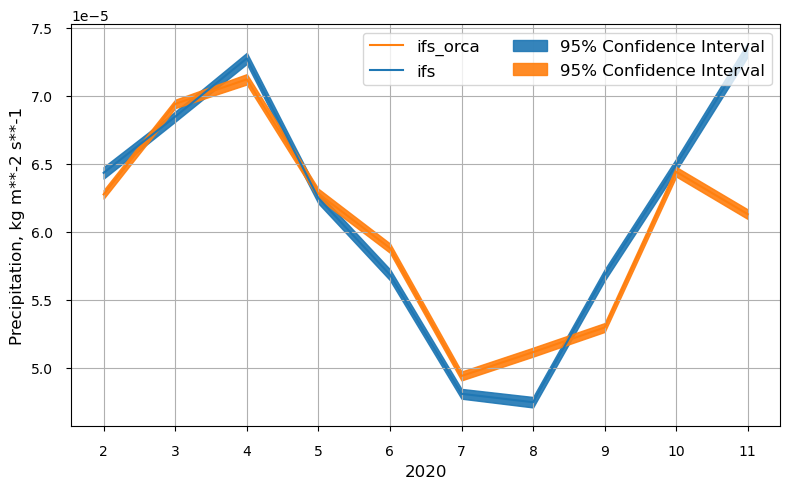

In [14]:
diag.check_if_belong_to_confidence_interval(ifs, dataset_2=ifs_orca, legend_1='ifs', legend_2='ifs_orca')

The second dataset is not within the 95% confidence interval of the first dataset.


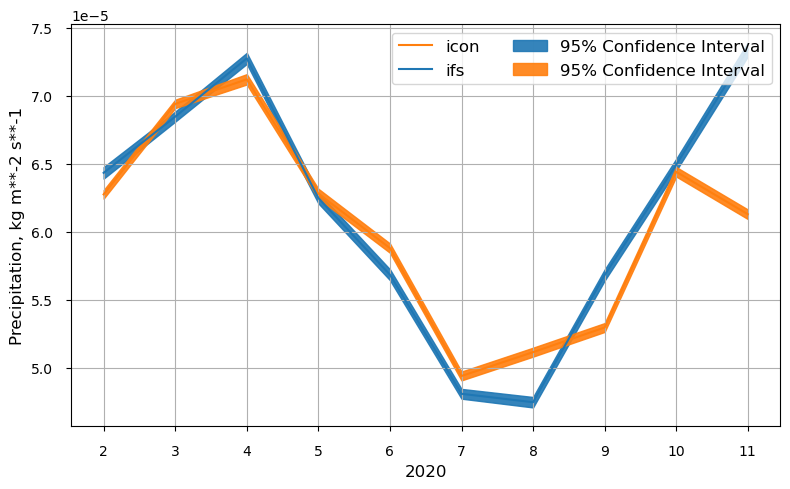

In [15]:
diag.check_if_belong_to_confidence_interval(ifs, dataset_2=icon, legend_1='ifs', legend_2='icon')

##### Comparison of confidence intervals of `icon` and `mswep` datasets along the time coordinate for 2020.

The second dataset is not within the 95% confidence interval of the first dataset.


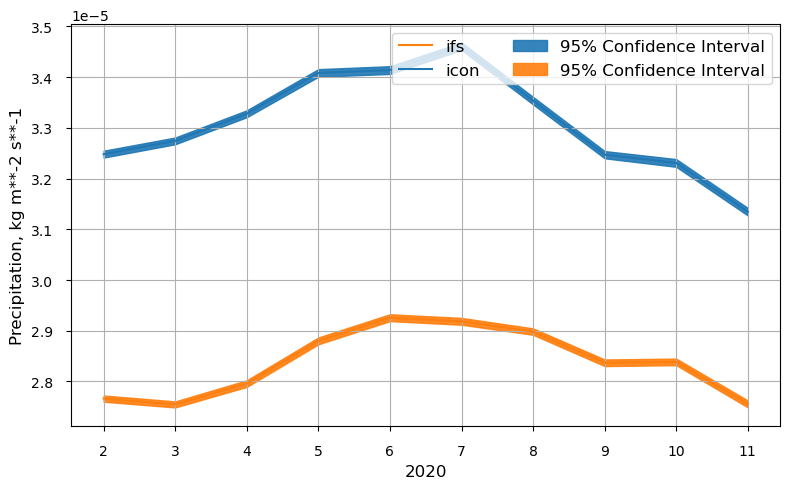

In [18]:
diag.trop_lat=90
diag.check_if_belong_to_confidence_interval(ifs.sel(time='2020'), dataset_2=ifs, legend_1='icon', legend_2='ifs')

##### Comparison of confidence intervals of `icon` and `ifs` datasets along the time coordinate for 2020.

The second dataset is not within the 95% confidence interval of the first dataset.


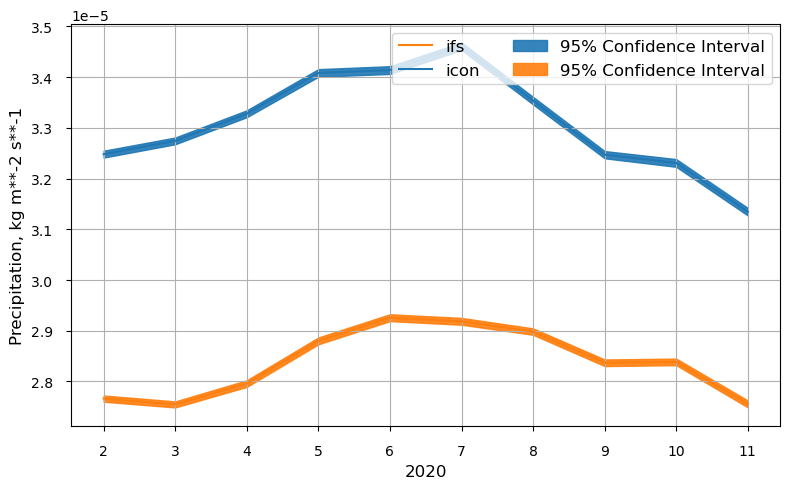

In [19]:
diag.check_if_belong_to_confidence_interval(icon.sel(time='2020'), dataset_2=ifs, legend_1='icon', legend_2='ifs')

##### Comparison of confidence intervals of `ifs` and `era5` datasets along the tropical latitude (`trop_lat = 10` by default) coordinate

In [ ]:
diag.check_if_belong_to_confidence_interval(ifs, dataset_2=ifs_orca, coord = 'lat', legend_1='ifs monthly', path_to_figure='./conf_interval.png', 
                                            loc='upper left')

##### Comparison of confidence intervals of `icon` and `era5` datasets along the tropical latitude (`trop_lat = 10` by default) coordinate

The second dataset is not within the 95% confidence interval of the first dataset.


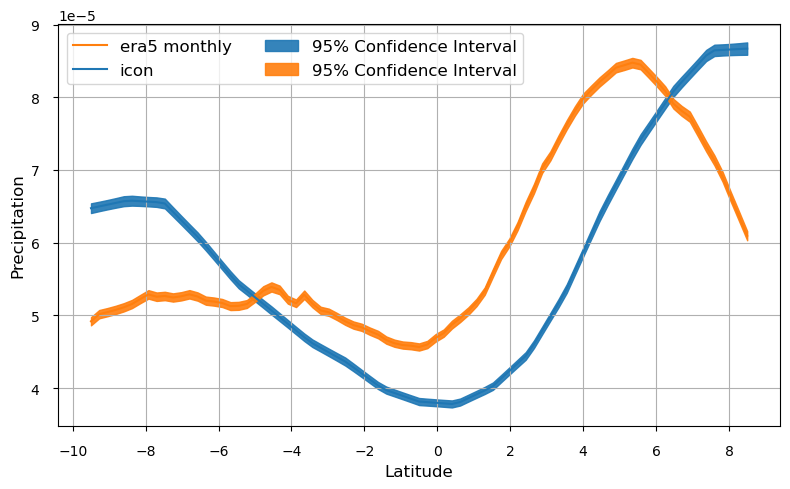

In [6]:
diag.check_if_belong_to_confidence_interval(ifs, dataset_2=ifs_orca, coord = 'lat', legend_1='icon', loc='upper left')

In [16]:
diag.check_if_belong_to_confidence_interval(ifs, coord = 'lon')

#

##### The end